# 实验一
自定义Inception网络，并在Kaggle猫/狗数据集上进行训练和测试
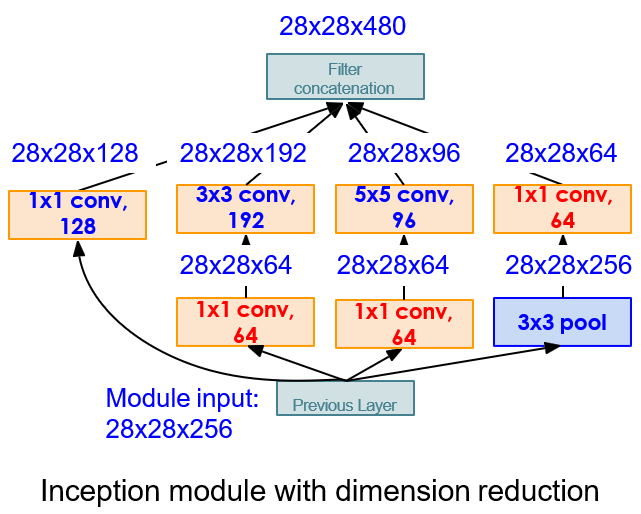

## 1.加载keras模块

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, AveragePooling2D,Input,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense,Concatenate
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras import backend as K
import numpy as np

### 定义Inception网络结构



In [33]:
#声明Input layer并设置input_shape    
img_width, img_height = 50, 50

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    bn_axis = 1
else:
    input_shape = (img_width, img_height, 3)
    bn_axis = 3    
 x = Input (shape = input_shape)     
       
#以函数形式定义inception module的分支，可适当比上图inception结构减少滤波器个数
#branch 1
branch1_out = Conv2D(16, (1, 1),
    padding="same",
    use_bias=False)(x)#布尔值，不使用偏置项
branch1_out = BatchNormalization(axis=bn_axis)(branch1_out)
branch1_out = Activation('relu')(branch1_out)
    
    
#branch 2   
branch2_out = Conv2D(
         16, (1, 1),
         padding="same",
         use_bias=False)(x)
branch2_out = BatchNormalization(axis=bn_axis)(branch2_out)
branch2_out = Activation('relu')(branch2_out)    
branch2_out = Conv2D(
         48, (3, 3),
         padding="same",
         use_bias=False)(branch2_out)
branch2_out = BatchNormalization(axis=bn_axis)(branch2_out)
branch2_out = Activation('relu')(branch2_out) 


#branch 3
branch3_out = Conv2D(
       16, (1, 1),
        padding="same",
        use_bias=False)(x)
branch3_out = BatchNormalization(axis=bn_axis)(branch3_out)
branch3_out = Activation('relu')(branch3_out)
branch3_out = Conv2D(
         24, (5, 5),
         padding="same",
         use_bias=False)(branch3_out)
branch3_out = BatchNormalization(axis=bn_axis)(branch3_out)
branch3_out = Activation('relu')(branch3_out) 

#branch 4
branch4_out = AveragePooling2D(
        pool_size=(3, 3),strides=(1, 1), padding='same', data_format=K.image_data_format())(x)
branch4_out = Conv2D(
         16, (1, 1),
         padding="same",
         use_bias=False)(branch4_out)
branch4_out = BatchNormalization(axis=bn_axis)(branch4_out)
branch4_out = Activation('relu')(branch4_out) 

#以函数形式定义inception module的concatenate layer
out = Concatenate(axis=bn_axis)([branch1_out, branch2_out, branch3_out, branch4_out])

#为减少网络规模，可使用1*1 conv layer压缩feature map深度
out = Conv2D(
         16, (1, 1),
         padding="same",
         use_bias=False)(out)
#定义fully connected layer
out = Flatten()(out)
out = Dense(48, activation='relu')(out)
#定义output layer
out = Dense(1, activation='sigmoid')(out)

#调用Model函数声明model
model = Model(x, out)
#编译整个网络，声明loss函数和优化器、metrics
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### 查看model架构



In [34]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 50, 50, 16)   48          input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 50, 50, 16)   48          input_18[0][0]                   
__________________________________________________________________________________________________
batch_normalization_102 (BatchN (None, 50, 50, 16)   64          conv2d_109[0][0]                 
___________________________________________________________________________________________

### 定义ImageDataGenerator


In [27]:
train_data_dir = r'C:\Users\coffe\Desktop\dogs-vs-cats\train'
validation_data_dir = r'C:\Users\coffe\Desktop\dogs-vs-cats\validation'
nb_train_samples = 10835
nb_validation_samples = 4000
epochs = 1
batch_size = 5


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

#调用flow_from_directory函数读取training数据和validation数据，注意
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 10835 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


### 训练模型



In [35]:
#调用fit_generator函数

ResourceExhaustedError: OOM when allocating tensor with shape[2340000,48] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node dense_29/random_uniform/RandomUniform (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4357) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Original stack trace for 'dense_29/random_uniform/RandomUniform':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-59f85435779c>", line 66, in <module>
    out = Dense(48, activation='relu')(out)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 463, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\core.py", line 895, in build
    constraint=self.kernel_constraint)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 279, in add_weight
    weight = K.variable(initializer(shape, dtype=dtype),
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\initializers.py", line 227, in __call__
    dtype=dtype, seed=self.seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 4357, in random_uniform
    shape, minval=minval, maxval=maxval, dtype=dtype, seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 5253, in random_uniform
    shape, minval=minval, maxval=maxval, dtype=dtype, seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\random_ops.py", line 247, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 859, in random_uniform
    name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


### 使用训练后模型预测图像





In [48]:
import cv2
img = cv2.resize(cv2.imread(r'C:\Users\coffe\Desktop\dogs-vs-cats\test\7.jpg'), (img_width, img_height)).astype(np.float32)
# img[:,:,0] -= 103.939
# img[:,:,1] -= 116.779
# img[:,:,2] -= 123.68
#img = img.transpose((2,0,1))
x = img_to_array(img)

x = np.expand_dims(x, axis=0)

#x = preprocess_input(x)

score = model.predict(x)


print(score)

[[0.99895906]]
